<img src="https://www.thamehub.co.uk/wp-content/uploads/2016/09/UK-Power-networks.jpg" alt = "Alt text" style="width:480px;height:400px;">


# UK Power Networks Risk Assessment
UK Power Networks is responsible for delivering electricity to over 8 million customers in London, the South East and East of England. To ensure that the electricity networks are reliable, safe and secure, it is important to identify sites that are high risk of future use and contributing factors.

In this analysis, we will conduct a risk assessment of UK Power Networks. For the data available, we will look at characteristics of the site and find which sites has high risk of failure or danger. Also, we whether there are certain attributes of the grid that contribute to the unsafe standards.

In future analysis, we would be able to use historical data on power outages, population density, and critical infrastructure. We will also consider the potential impact of climate change and extreme weather events. By identifying high-risk sites and contributing factors, we can develop strategies to improve the resilience and reliability of the electricity networks.

## dataset - Key characteristics of active Grid and Primary sites

The meta-data was provided from the url source :https://ukpowernetworks.opendatasoft.com/explore/dataset/grid-and-primary-sites/information/?disjunctive.sitename&disjunctive.local_authority&disjunctive.powertransformercount
Here is a brief description for each feature/column:
1. `SiteFunctionalLocation` - This is the Site alias in both the Network Control and Asset Management System. It includes the site number
2. `LicenceArea` - This holds the Licence Area or DNO (Distribution Network Operator) name
3. `SiteName` - The Name of the Site as per the UK Power Networks Control and Asset Management System
4. `SiteType` - This splits the data between Grid (132kV/66kV) and Primary (11kV - 33kV)
5. `SiteVoltage` - Highest voltage on the site
6. `ESQCROverallRisk` - Electricity Safety, Quality and Continuity Regulations (ESQCR) give each site a risk based on a defined set of criteria
7. `GridRef` - Ordnance Survey Grid Reference
8. `SiteAssetCount` - Total Number of assets on the site
9. `PowerTransformerCount` - Number of Power Transformers on the site
10. `ElectricalAssetCount` - Number of assets in the site which form part of the electrical network or monitor/control the network
11. `CivilAssetCount` - Number of Civils assets on the site (e.g. buildings; roads; water; waste; etc.)
12. `Longitude` - Site Longitude (based on the Grid Reference)
13. `Latitude` - Site Latitude (based on the Grid Reference)
14. `YearCommissioned` - Year the sites Electrical Network was energised
15. `DateCommissioned` - Date the sites Electrical Network was energised


The last modified date on this dataset is 4/5/2023.

In [2]:
#load the necessary modules for data analysis
import os
import pandas as pd #data manipulation
import numpy as np

import seaborn as sns #statistical visuals
import matplotlib.pyplot as plt #visualization

from shapely.geometry import Point 
import folium #display map plots
import plotly #interactive plots
import scipy #needed to include cumulative argument for density plot in seaborn
import geopandas as gpd #maniputate spatial data

In [3]:
#load the grid and primary sites dataset
gap_sites = pd.read_csv("data/grid-and-primary-sites.csv")

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
display(gap_sites.head())

,SiteFunctionalLocation,LicenceArea,SiteName,SiteType,SiteVoltage,ESQCROverallRisk,GridRef,SiteAssetCount,PowerTransformerCount,ElectricalAssetCount,CivilAssetCount,Longitude,Latitude,Street,Suburb,TownCity,County,PostCode,YearCommissioned,DateCommissioned,SiteClassification,AssessmentDate,Last_Report,CalculatedResistance,MeasuredResistance.Ohm.,Next_AssessmentDate,Easting,Northing,transratingwinter,transratingsummer,reversepower,maxdemandsummer,maxdemandwinter,Spatial Coordinates,local_authority,local_authority_code
0,EPN-S0000000C1014,Eastern Power Networks (EPN),DISS GRID 132kV,Grid Substation,132,High,TM1154079458,72,0,47,25,1.106116,52.372303,NaN,NaN,DISS,Norfolk,IP22 4AU,1969.0,1960-04-01,COLD,2012-09-24,P-12-2032-01,NaN,0.11,2029-11-26,611540.0,279458.0,NaN,NaN,NaN,NaN,NaN,"52.3723032543849, 1.10611633424584",South Norfolk,E07000149
1,EPN-S0000000C1018,Eastern Power Networks (EPN),STOWMARKET GRID 132kV,Grid Substation,132,High,TM0649056846,80,0,61,19,1.018214,52.171224,NaN,NaN,STOWMARKET SOUTH,Suffolk,IP6 8RS,1953.0,1952-04-01,COLD,2012-09-24,P-12-2027-01,NaN,0.11,2027-11-26,606490.0,256846.0,NaN,NaN,NaN,NaN,NaN,"52.171223636163, 1.01821448090138",Mid Suffolk,E07000203
2,EPN-S0000000C1193,Eastern Power Networks (EPN),HALESWORTH BESS 132KV,Grid Substation,132,Very High,TM3887878798,1,0,1,0,1.506475,52.355156,REAR OF HALESWTH BUSINESS CTRE,NaN,NaN,Norfolk,IP19 8TS,NaN,1900-01-01,NaN,NaN,NaN,NaN,NaN,NaN,638878.0,278798.0,NaN,NaN,NaN,NaN,NaN,"52.3551556194434, 1.50647501052302",East Suffolk,E07000244
3,EPN-S0000000C4001,Eastern Power Networks (EPN),ARBURY GRID 132kV,Grid Substation,132,Medium,TL4561861800,198,0,156,42,0.130979,52.235141,KINGS HEDGES ROAD,ARBURY,CAMBRIDGE,Cambridgeshire,CB4 2QT,2008.0,2003-04-01,COLD,2020-02-14,ELP03583-R01,0.46Ω 0.00Deg,0.10,2025-11-30,545618.0,261800.0,NaN,NaN,NaN,NaN,NaN,"52.2351409296593, 0.130979173795973",Cambridge,E07000008
4,EPN-S0000000C4008,Eastern Power Networks (EPN),GRENDON GRID 132kV,Grid Substation,132,Medium,SP8710061339,46,0,46,0,-0.725758,52.243354,NaN,NaN,GRENDON,Buckinghamshire,NN7 1JD,NaN,1962-04-01,HOT,2022-10-18,ELP07260036-R01,0.05Ω 0.00Deg,0.05,2038-11-26,487100.0,261339.0,NaN,NaN,NaN,NaN,NaN,"52.2433541323352, -0.725757590040524",North Northamptonshire,E06000061


A quick observation is that `YearCommissioned` and `DateCommissioned` does not match for many observation which appears contradictory unless there is missing context that was not included in the meta data. I'll have to check with UK Power Networks (https://ukpowernetworks.opendatasoft.com/) for clarification. On a sidenote, `YearCommisioned` should be an integer instead of a float which would be quick to resolve. We'll perform several descriptive summaries and get a feel for the dataset.

In [6]:
display(gap_sites.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SiteFunctionalLocation   1886 non-null   object 
 1   LicenceArea              1886 non-null   object 
 2   SiteName                 1886 non-null   object 
 3   SiteType                 1886 non-null   object 
 4   SiteVoltage              1886 non-null   int64  
 5   ESQCROverallRisk         1882 non-null   object 
 6   GridRef                  1884 non-null   object 
 7   SiteAssetCount           1886 non-null   int64  
 8   PowerTransformerCount    1886 non-null   int64  
 9   ElectricalAssetCount     1886 non-null   int64  
 10  CivilAssetCount          1886 non-null   int64  
 11  Longitude                1884 non-null   float64
 12  Latitude                 1884 non-null   float64
 13  Street                   1132 non-null   object 
 14  Suburb                  

None

In [7]:
display(gap_sites.select_dtypes(include='object').head())

,SiteFunctionalLocation,LicenceArea,SiteName,SiteType,ESQCROverallRisk,GridRef,Street,Suburb,TownCity,County,PostCode,DateCommissioned,SiteClassification,AssessmentDate,Last_Report,CalculatedResistance,Next_AssessmentDate,transratingwinter,transratingsummer,reversepower,maxdemandsummer,maxdemandwinter,Spatial Coordinates,local_authority,local_authority_code
0,EPN-S0000000C1014,Eastern Power Networks (EPN),DISS GRID 132kV,Grid Substation,High,TM1154079458,NaN,NaN,DISS,Norfolk,IP22 4AU,1960-04-01,COLD,2012-09-24,P-12-2032-01,NaN,2029-11-26,NaN,NaN,NaN,NaN,NaN,"52.3723032543849, 1.10611633424584",South Norfolk,E07000149
1,EPN-S0000000C1018,Eastern Power Networks (EPN),STOWMARKET GRID 132kV,Grid Substation,High,TM0649056846,NaN,NaN,STOWMARKET SOUTH,Suffolk,IP6 8RS,1952-04-01,COLD,2012-09-24,P-12-2027-01,NaN,2027-11-26,NaN,NaN,NaN,NaN,NaN,"52.171223636163, 1.01821448090138",Mid Suffolk,E07000203
2,EPN-S0000000C1193,Eastern Power Networks (EPN),HALESWORTH BESS 132KV,Grid Substation,Very High,TM3887878798,REAR OF HALESWTH BUSINESS CTRE,NaN,NaN,Norfolk,IP19 8TS,1900-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"52.3551556194434, 1.50647501052302",East Suffolk,E07000244
3,EPN-S0000000C4001,Eastern Power Networks (EPN),ARBURY GRID 132kV,Grid Substation,Medium,TL4561861800,KINGS HEDGES ROAD,ARBURY,CAMBRIDGE,Cambridgeshire,CB4 2QT,2003-04-01,COLD,2020-02-14,ELP03583-R01,0.46Ω 0.00Deg,2025-11-30,NaN,NaN,NaN,NaN,NaN,"52.2351409296593, 0.130979173795973",Cambridge,E07000008
4,EPN-S0000000C4008,Eastern Power Networks (EPN),GRENDON GRID 132kV,Grid Substation,Medium,SP8710061339,NaN,NaN,GRENDON,Buckinghamshire,NN7 1JD,1962-04-01,HOT,2022-10-18,ELP07260036-R01,0.05Ω 0.00Deg,2038-11-26,NaN,NaN,NaN,NaN,NaN,"52.2433541323352, -0.725757590040524",North Northamptonshire,E06000061


Lets also look at the percentage quantiles of the numerical columns. (float64 and int64)

In [31]:
#summary statistics of numerical columns
display(gap_sites.select_dtypes(include=['float64', 'int64']).describe())

,SiteVoltage,SiteAssetCount,PowerTransformerCount,ElectricalAssetCount,CivilAssetCount,Longitude,Latitude,MeasuredResistance.Ohm.,Easting,Northing
count,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1884.000000,1884.000000,1174.000000,1884.000000,1884.000000
mean,56.052492,133.050901,1.212089,117.239130,15.811771,0.293370,51.738017,0.246499,558283.189490,207018.875796
std,41.959396,129.352977,1.268505,121.479852,13.882534,0.586535,0.506100,2.708771,39728.500828,56801.099507
min,6.000000,1.000000,0.000000,0.000000,0.000000,-0.958709,50.758169,0.000000,472000.000000,97851.000000
25%,33.000000,36.000000,0.000000,29.000000,5.000000,-0.156612,51.402836,0.060000,528635.000000,169664.250000
50%,33.000000,112.000000,1.000000,97.500000,13.000000,0.153851,51.595739,0.090000,548804.500000,191192.500000
75%,66.000000,168.000000,2.000000,145.000000,23.000000,0.713547,52.076981,0.170000,587606.250000,245052.750000
max,132.000000,1010.000000,8.000000,1000.000000,125.000000,1.757331,52.945116,91.000000,655221.000000,342200.000000


According to the meta data, `SiteVoltage` should be treated as a category since each value is grouped based on Grid (132kV/66kV) and Primary (11kV - 33kV). Lets parse the column into a category and find out which `SiteVoltage` is more common.

In [38]:
#lets convert Site Voltage into a categorical variable
gap_sites['SiteVoltage'] = gap_sites['SiteVoltage'].astype('category')

#get frequency table of Site Voltage
display("The possible values of Site Voltage:", gap_sites['SiteVoltage'].unique())
display("The frequency across different Site Voltage:", gap_sites['SiteVoltage'].value_counts())

'The possible values of Site Voltage:'

[132, 33, 11, 22, 6, 66, 20]
Categories (7, int64): [6, 11, 20, 22, 33, 66, 132]

'The frequency across different Site Voltage:'

SiteVoltage
33     1359
132     434
66       44
11       32
22       13
6         3
20        1
Name: count, dtype: int64

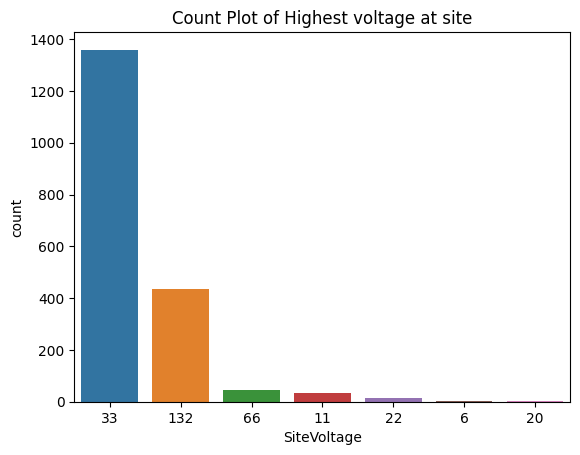

In [41]:
# get the category counts and sort by frequency of occurrence
category_counts = gap_sites['SiteVoltage'].value_counts().sort_values(ascending=False).index.tolist()

#display count plots of highest voltage at site
sns.countplot(x='SiteVoltage', data=gap_sites, order=category_counts)
plt.title("Count Plot of Highest Voltage at Site")
plt.show()

The count plot indicates `SiteVoltage` at 33kV is the most common (1359) and 132kV since voltage is typically discrete and measured in specific intervals or levels, which makes it a good candidate for a categorical variable. The meta data has `SiteType` between Grid (132kV/66kV) and Primary (11kV - 33kV). Lets perform a tabular table to confirm it.

In [9]:
display(pd.crosstab(gap_sites['SiteVoltage'], gap_sites['SiteType']))


SiteType,Grid Substation,Primary Substation
SiteVoltage,,
6,1,2
11,14,18
20,0,1
22,0,13
33,60,1299
66,13,31
132,425,9


It looks like overlap between `SiteType` and `SiteVoltage` in contrast to what the meta data seems to suggest. It is probably because `SiteType` refers to the range of voltages at the site versus `SiteVoltage` refers to the highest setting. I would have ask UK Power Network (https://ukpowernetworks.opendatasoft.com/) for clarification and context, but it is good to verfiy before making an assumption about characteristic of the data. Now, lets list the date columns for formally convert them into date object.

In [10]:
date_columns = ['DateCommissioned', 'YearCommissioned', 'AssessmentDate', 'Next_AssessmentDate']

for date_col in date_columns:
    if date_col == 'YearCommissioned':
        gap_sites[date_col] = pd.to_datetime(gap_sites[date_col], format='%Y')
        #data[date_col] = date[date_col].dt.year
    else:
        gap_sites[date_col] = pd.to_datetime(gap_sites[date_col], format='%Y-%m-%d')

display(gap_sites[date_columns].describe())

,DateCommissioned,YearCommissioned,AssessmentDate,Next_AssessmentDate
count,1886,1149,1542,1803
mean,1972-05-21 04:44:47.592788976,1973-03-18 05:17:04.543080944,2016-06-21 02:52:45.758754816,2032-08-20 00:58:18.169717248
min,1900-01-01 00:00:00,1930-01-01 00:00:00,1996-07-12 00:00:00,2023-01-11 00:00:00
25%,1956-04-01 00:00:00,1961-01-01 00:00:00,2013-10-04 18:00:00,2028-11-26 00:00:00
50%,1963-04-01 00:00:00,1966-01-01 00:00:00,2016-07-27 12:00:00,2032-11-26 00:00:00
75%,2001-04-01 00:00:00,1984-01-01 00:00:00,2019-08-23 00:00:00,2036-11-26 00:00:00
max,2023-03-15 00:00:00,2021-01-01 00:00:00,2023-03-24 00:00:00,2039-12-12 00:00:00


There is noticeable amount of missing data with `AssessmentDate` and `YearCommissioned` epecially. Another observation is about half of the observations for columns `DateCommissioned` and `YearCommissioned` are before 1963 and 1966 respectively. Lets look at the relationship between the features related to counting assets (ElectricalAssetCount, PowerTransformerCount, SiteAssetCount, CivilAssetCount).

In [11]:
count_cols = ['ElectricalAssetCount', 'PowerTransformerCount', 'SiteAssetCount', 'CivilAssetCount']
display(gap_sites[count_cols].head())
display(gap_sites[count_cols].tail())

,ElectricalAssetCount,PowerTransformerCount,SiteAssetCount,CivilAssetCount
0,47,0,72,25
1,61,0,80,19
2,1,0,1,0
3,156,0,198,42
4,46,0,46,0


,ElectricalAssetCount,PowerTransformerCount,SiteAssetCount,CivilAssetCount
1881,156,2,194,38
1882,191,5,232,41
1883,94,0,97,3
1884,41,1,53,12
1885,5,0,8,3


Looks like column `SiteAssetCount` is the sum of `CivilAssetCount` and `ElectricalAssetCount`. Lets check using conditional statements.

In [12]:
display('number incorrect:', sum(gap_sites['ElectricalAssetCount'] + gap_sites['CivilAssetCount'] != gap_sites['SiteAssetCount']))

'number incorrect:'

0

It confirms that `SiteAssetCount` is the sum of `ElectricalAssetCount` and `CivilAssetCount`. Before we can do spatial visualizations, the spatial points must be not be missing. We will check for missing observations related to spatial coordinates. Also, look at `Spatial Coordinates` (object type) is consistent with numerical columns `Latitude` and `Longitude`. Note: the reason `Spatial Coordinates` is an object instead of a numeric is because the column has a parenthesis and a comma which parse the data into an object.

In [13]:
gap_sites.loc[~gap_sites['Spatial Coordinates'].apply(lambda x: isinstance(x, str))].index

Index([1232, 1696], dtype='int64')

In [14]:
gap_sites.loc[gap_sites['Spatial Coordinates'].isna(),['Spatial Coordinates', 'Latitude', 'Longitude']]

,Spatial Coordinates,Latitude,Longitude
1232,NaN,NaN,NaN
1696,NaN,NaN,NaN


In [15]:
#create a temporary column where we convert a coordinate object (string) into a tuple of coordinates (float)
coord_split = (lambda x: tuple(np.float64(coord) for coord in filter(pd.notna, x.split(','))) if pd.notna(x) else None)
gap_sites['temp'] = gap_sites['Spatial Coordinates'].apply(coord_split)

In [16]:
#check if the only missing spatial coordination also relates to columns Latitude and Longitude
missing_coord = gap_sites['Spatial Coordinates'].isna()

In [17]:
count = 0  #counter to iterate each time spatial coordinate component (Lat/Lon) from tuple matches with individual numeric (Lat/Lon)
for x in range(len(gap_sites)):
    if missing_coord[x]: #if coord is missing continue on loop b/c error generate with missing data and not useful to plot
        continue
    else:
        count += (gap_sites["Latitude"][x] == gap_sites["temp"][x][0]) & (gap_sites["Longitude"][x] == gap_sites["temp"][x][1])
print(count/sum(~missing_coord)) #ratio of coordinates tuple temp matches with both Latitude and Longitude

0.9840764331210191


In this analysis, 98.4% of the non-missing coordinates of the tuple `Temp` matches with its corresponding `Latitude` and `Longitude`. However; it is possible the precision is different between the coordinates tuple `Temp` and `Latitude` and `Longitude`. Lets try to compare the number with the same precision and decide which column to use.

In [18]:
count = 0  #counter to iterate each time spatial coordinate component (Lat/Lon) from tuple matches with individual numeric (Lat/Lon)
for x in range(len(gap_sites)):
    if missing_coord[x]: #if coord is missing continue on loop b/c error generate with missing data and not useful to plot
        continue
    else:
        count += (gap_sites["Latitude"][x].round(4) == gap_sites["temp"][x][0].round(4)) & (gap_sites["Longitude"][x].round(4) == gap_sites["temp"][x][1].round(4))
print(count/sum(~missing_coord)) #ratio of coordinates tuple temp matches with both Latitude and Longitude

1.0


When rounding to 4 decimals, 100% of the mon-missing coordinates of the tuple `Temp` matches with `Latitude` and `Longitude` respectively. Lets take a quick look at both columns to see the precision of each column.

In [19]:
#try to observe a few observation of Latitude, Longitude for comparison to coordinate pair to temp
display(gap_sites[['Longitude', 'Latitude', 'temp']].head())

,Longitude,Latitude,temp
0,1.106116,52.372303,"(52.3723032543849, 1.10611633424584)"
1,1.018214,52.171224,"(52.171223636163, 1.01821448090138)"
2,1.506475,52.355156,"(52.3551556194434, 1.50647501052302)"
3,0.130979,52.235141,"(52.2351409296593, 0.130979173795973)"
4,-0.725758,52.243354,"(52.2433541323352, -0.725757590040524)"


The precision for `Longitude` and `Latitude` is 6 compared to 13 for the coordinate pairs `temp`. Typically, a precision of 6 is sufficient to plotting in the scale of city-scale locations. Lets stick with using `Latitude` and `Longitude` for plotting maps.

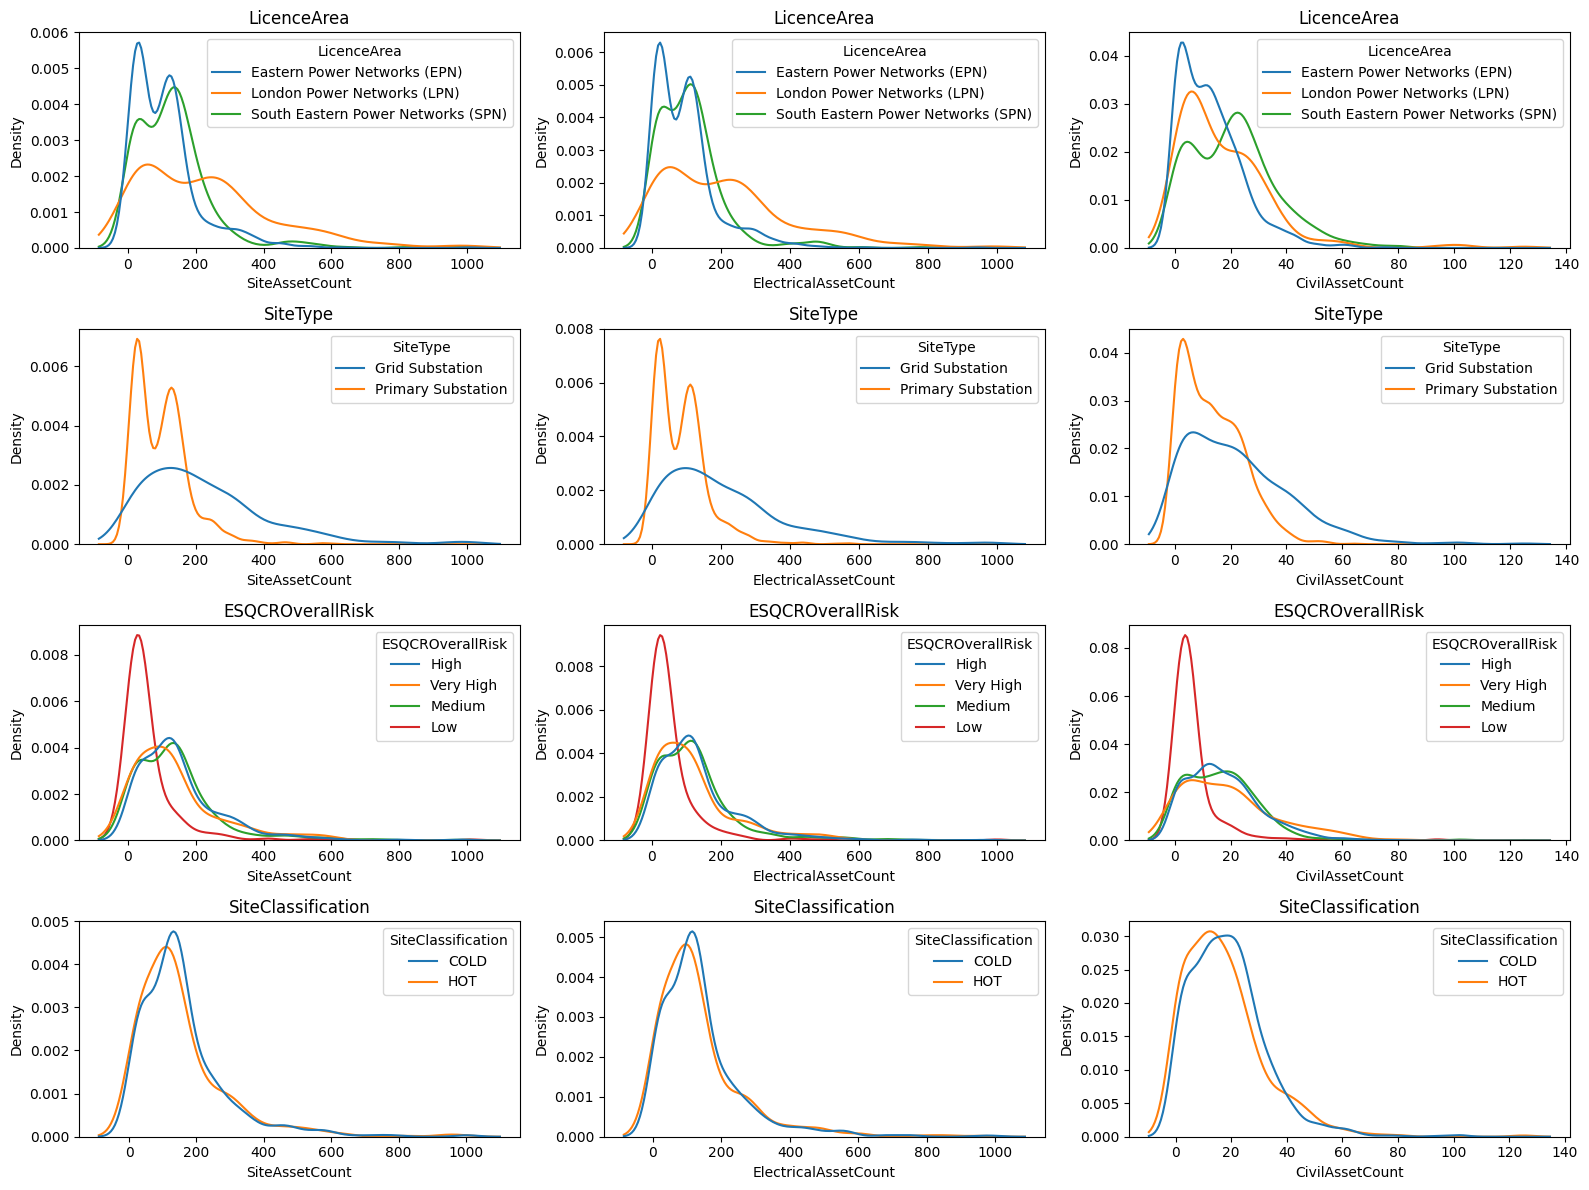

In [20]:
#probability density function
fig, axes = plt.subplots(4, 3, figsize=(16, 12))
for i, coli in enumerate(['LicenceArea', 'SiteType', 'ESQCROverallRisk', 'SiteClassification']):
    for j, colj in enumerate(['SiteAssetCount', 'ElectricalAssetCount', 'CivilAssetCount']):
        sns.kdeplot(
            data=gap_sites, x=colj, hue=coli,
            cumulative=False, common_norm=False, common_grid=True, ax=axes[i, j]
        )
        
        # Add titles to the subplots
        axes[np.unravel_index(i*3+j, axes.shape)].set_title(coli)
    
# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

Note that `SiteAssetCount` consist of the sum of `ElectricalAssetCount` and `CivilAssetCount`. The shape and range of the distribution for `SiteAssetCount` is approximate to `ElectricalAssetCount`. This suggests that `ElectricalAssetCount` makes up most of the `SiteAssetCount` compared to `CivilAssetCount`. It makes sense because we would expect to see power grid consist more of transformers, switches, conductors, etc compared to cables, roads, towers, gates, etc. I'm curious about the distribution of percentage that `ElectricalAssetCount` makes up out of `SiteAssetCount`.

For row plots associated with `LicenceArea`, there appears to different distributional characteristics with both `ElectricalAssetCount` and `CivilAssetCount`.

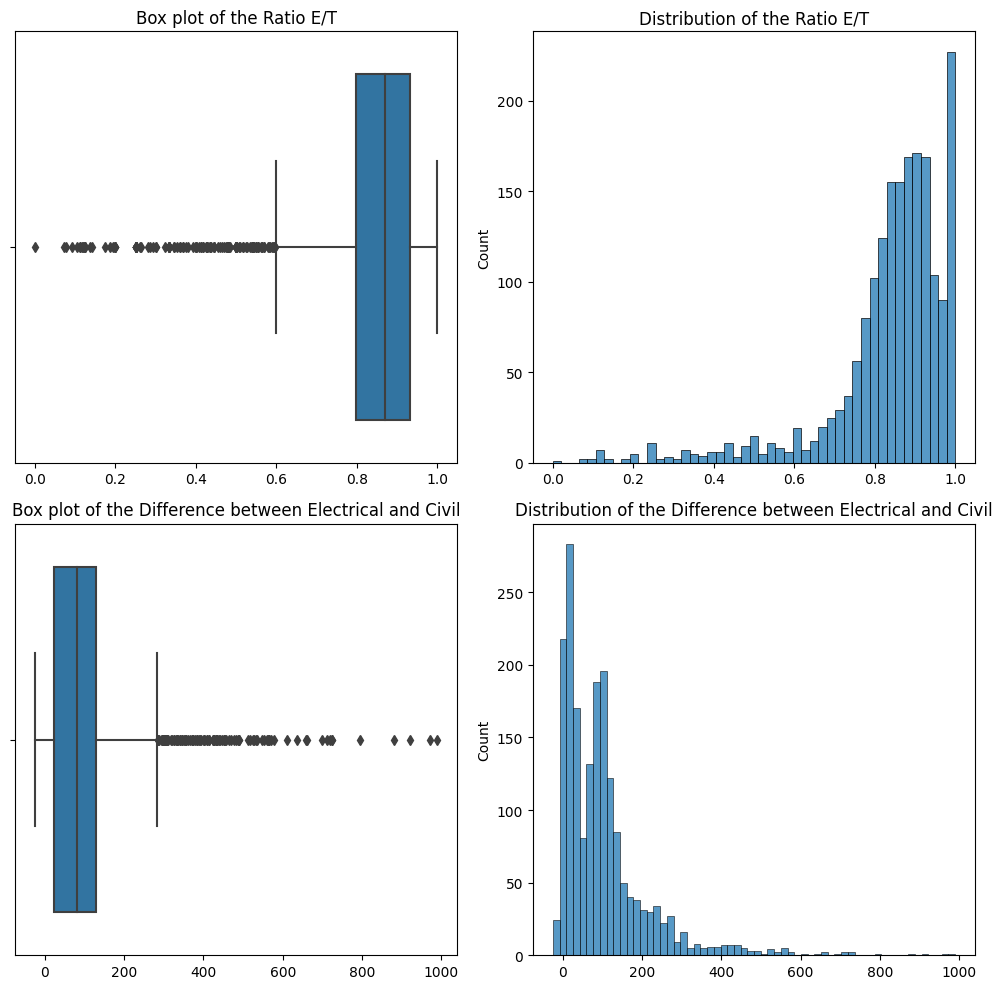

In [57]:
#Calculate the ratio of Electrical Assets over Site Assets
_ = gap_sites['ElectricalAssetCount']/gap_sites['SiteAssetCount']

#create a set of plots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

#boxplot of ratio
sns.boxplot(x=_ , ax=axes[0,0])
axes[0,0].set_title('Box plot of the Ratio E/T')

#histogram of ration
sns.histplot(
            x=_, cumulative=False, common_norm=False, ax=axes[0,1]
)
axes[0,1].set_title('Distribution of the Ratio E/T')

#Calculate the ratio of Electrical Assets over Site Assets
_ = gap_sites['ElectricalAssetCount'] - gap_sites['CivilAssetCount']


#boxplot of ratio
sns.boxplot(x=_ , ax=axes[1,0])
axes[1,0].set_title('Box plot of the Difference between Electrical and Civil')

#histogram of difference
sns.histplot(
            x=_, cumulative=False, common_norm=False, ax=axes[1,1]
)
axes[1,1].set_title('Distribution of the Difference between Electrical and Civil')


plt.tight_layout() #fit layout of plots
plt.show() #display plots


Looking at the bottom whisker of the boxplot, it looks like only 25% of the sites have `ElectricalAssetCount` be comprised less than 80% of the `SiteAssetCount`. The distribution in middle figure shows how much coverage (area under the curve) `ElectricalAssetCount` mostedly above mid-80 percentile. The last 2 figure (bottom) gives a clearly picture since the difference between `ElectricalAssetCount` and `CivilAssetCount` is mostly above 50 units which explain why the distribution between `ElectricalAssetCount` and `CivilAssetCount` is neglible.

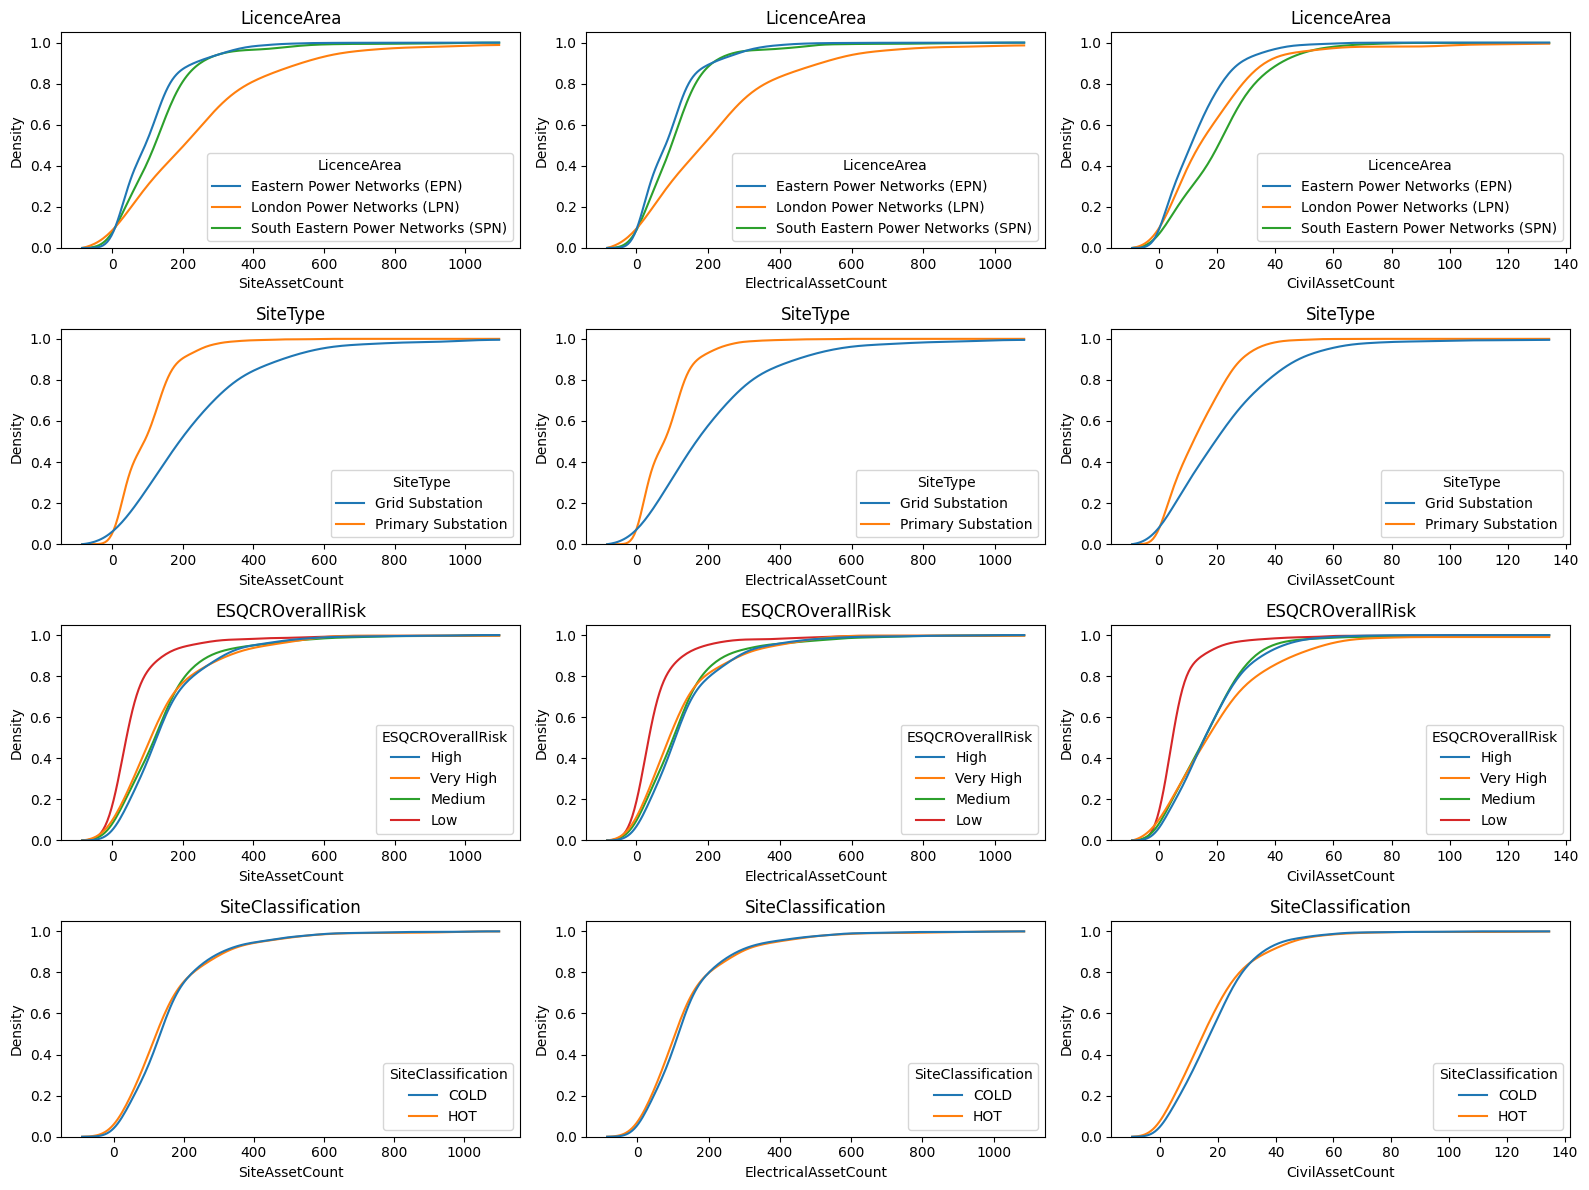

In [21]:
#cumulative density function
fig, axes = plt.subplots(4, 3, figsize=(16, 12))
for i, coli in enumerate(['LicenceArea', 'SiteType', 'ESQCROverallRisk', 'SiteClassification']):
    for j, colj in enumerate(['SiteAssetCount', 'ElectricalAssetCount', 'CivilAssetCount']):
        sns.kdeplot(
            data=gap_sites, x=colj, hue=coli,
            cumulative=True, common_norm=False, common_grid=True, ax=axes[i,j]
        )
        
        # Convert data to numpy array before indexing
        x = np.array(axes[i,j].get_xlim())[:, None]
        y = np.array(axes[i,j].get_ylim())[:, None]
        axes[i,j].set_xlim(x.min(), x.max())
        axes[i,j].set_ylim(y.min(), y.max())
        
        # Add titles to the subplots
        axes[i,j].set_title(coli)
    
# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

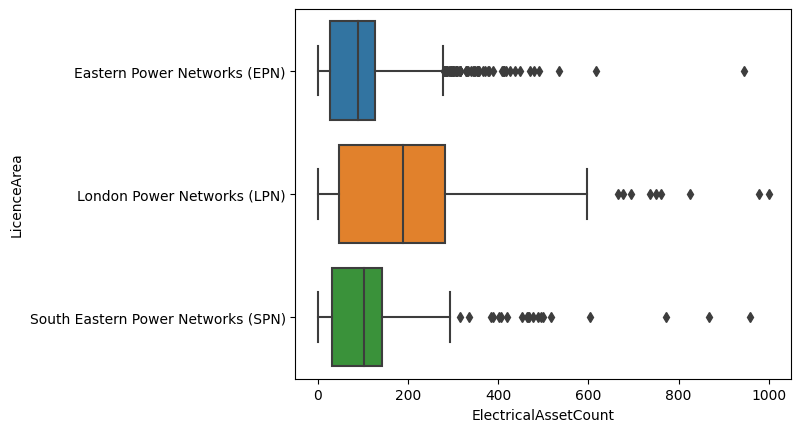

In [43]:
sns.boxplot(data=gap_sites, y="LicenceArea", x="ElectricalAssetCount")

plt.show()

In [22]:
#create time diffeerence between last assesment date and current
gap_sites['Diff_time_Assess'] = gap_sites['Next_AssessmentDate'] - gap_sites['AssessmentDate']

In [23]:
gap_sites['geometry'] = gap_sites.apply(lambda x: Point(float(x.Longitude), float(x.Latitude)), axis=1)
uk_grid = gpd.GeoDataFrame(data=gap_sites, geometry=gap_sites.geometry, crs="epsg:4326")

In [24]:
uk_grid2 = uk_grid.dropna(subset = ['Latitude', 'Longitude', 'ESQCROverallRisk'])

In [25]:
from folium.plugins import Fullscreen
from ipywidgets import interact
import requests

In [ ]:
#dictionary where keys are column names and values are the proper titles to display
#title = {'SiteAssetCount':'Total Site Assets', 'PowerTransformerCount':'# of Power Transformers',
       # 'ElectricalAssetCount': '# of Electrical Assets', 'CivilAssetCount':'# of Civil Assets'}

#list of map tiles to add on the map
tiles = [name.strip() for name in """
    OpenStreetMap
    Stamen Terrain
    Stamen Toner
    Stamen Watercolor
    CartoDB positron
    CartoDB dark_matter""".strip().split('\n')]

#note the folium version does not have "Mapbox Bright", "Mapbox Control Room". For access, a token key needs to be created
#but we will add it on this code.

#tuple with zoom range from 0 to 18 
zoom=(0, 18)

#dictionary where key-values from title is switched for the purpose of translating widget values
col_select = {'Total Site Assets': 'SiteAssetCount', 
              '# of Power Transformers': 'PowerTransformerCount', 
              '# of Electrical Assets': 'ElectricalAssetCount', 
              '# of Civil Assets': 'CivilAssetCount'}

UK = [51.85, 0.5]

In [30]:
@interact(Zoom_start=zoom, Tile=tiles, Column=col_select)

def UK_map(Zoom_start=7, Tile="OpenStreetMap", Column='SiteAssetCount'):
    m = folium.Map(location=UK, zoom_start=Zoom_start, tiles=Tile)

    # Define the colors and sizes for the markers
    colors = {'Low': 'green', 'Medium': 'yellow', 'High': 'orange', 'Very High':'red'}
    size_scale = lambda x: (x - uk_grid2[Column].min()) / (uk_grid2[Column].max() - uk_grid2[Column].min()) * 10 + 5

    # Add marker to the map for each row in the dataframe
    for _, row in uk_grid2.iterrows():
        #add a pop out text of coordinates, transformers, assets, electrical assets, civil assets
        pop_text = '<div style="font-size:10px; font-weight:bold; line-height:0.4; width:125px; height:100px;">\
        <p>Longitude: {}</p\
        <p>Latitude: {}</p\
        <p>Transformers: {}</p\
        <p>Total Assets: {}</p\
        <p>Electrical Assets: {}</p\
        <p>Civil Assets: {}</p>\
        </div>'.format(np.round(row['Longitude'], 3), 
                        np.round(row["Latitude"], 3),
                        row['PowerTransformerCount'],
                        np.round(row['SiteAssetCount'], 3),
                        np.round(row['ElectricalAssetCount'], 3),
                        np.round(row['CivilAssetCount']), 3)
        
        #apply the marker to the map
        folium.CircleMarker(location=[row['Latitude'], row['Longitude']],
                            radius=size_scale(row[Column]),
                            color=colors[row['ESQCROverallRisk']],
                            popup = pop_text,
                            fill=True).add_to(m)


    # Add a title to the map
    title_html = '<h3 align="center" style="font-size:16px"><b> ESQCR Overall Risk Across Sites </b></h3>'
    m.get_root().html.add_child(folium.Element(title_html))    

    # Add the Fullscreen plugin to the map
    Fullscreen().add_to(m)    

    
    #'<div style="position: fixed; bottom: 50px; left: 50px; padding: 5px; border: 2px solid grey; z-index: 9999; font-size: 14px;">'
    
    # Add a legend for ESQCR Overall to the map
    legend_html = '''
         <div style="position: fixed; 
                     bottom: 75px; left: 50px; width: 150px; height: 125px; 
                     border:2px solid grey; z-index:9999; font-size:14px;
                     background-color:white;
                     ">
             &nbsp; ESQCR Overall Risk <br>
             &nbsp; <i class="fa fa-circle fa-1x" style="color:green"></i> Low<br>
             &nbsp; <i class="fa fa-circle fa-1x" style="color:yellow"></i> Medium<br>
             &nbsp; <i class="fa fa-circle fa-1x" style="color:orange"></i> High<br>
             &nbsp; <i class="fa fa-circle fa-1x" style="color:red"></i> Very High
             <hr style="margin:5px 0">
          </div>
         '''    
    m.get_root().html.add_child(folium.Element(legend_html))
  
    #set up the size of the markers for the legend
    min_size = uk_grid2[Column].min()
    max_size = uk_grid2[Column].max()
    step_size = (max_size - min_size) / 4 #split the size into 4 equal intervals from smallest to largest
    
    #customize the position, size, background of the legend box along with title
    #(based on the column selected from the widget) 
    legend_html_size = '''
    <div style="position: fixed; 
                 bottom: 75px; right: 50px; width: 125px; height: 150px; 
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color:white;
                 ">
         &nbsp; {} <br>
         '''.format(title[Column])

    #apply the size of markers from increments of 1/4 except the largest 
    for i in range(4):
        size = min_size + i * step_size
        radius = size_scale(size)
        label = '{:.0f}'.format(size)
        legend_html_size += '&nbsp; <i class="fa fa-circle fa-1x" style="color:{}; opacity: 0.5; font-size:{}pt"></i> {}<br>'.format(colors['Low'], radius, label)

    #apply the max size of the marker
    size = max_size
    radius = size_scale(size)
    label = '{:.0f}'.format(size)
    legend_html_size += '&nbsp; <i class="fa fa-circle fa-1x" style="color:{}; opacity: 0.5; font-size:{}pt"></i> {}<br>'.format(colors['Low'], radius, label)
    legend_html_size += '</div>'

    #add legend of the marker size for the selected column
    m.get_root().html.add_child(folium.Element(legend_html_size))
    
    return m #return the map

interactive(children=(IntSlider(value=7, description='Zoom_start', max=18), Dropdown(description='Tile', optio…